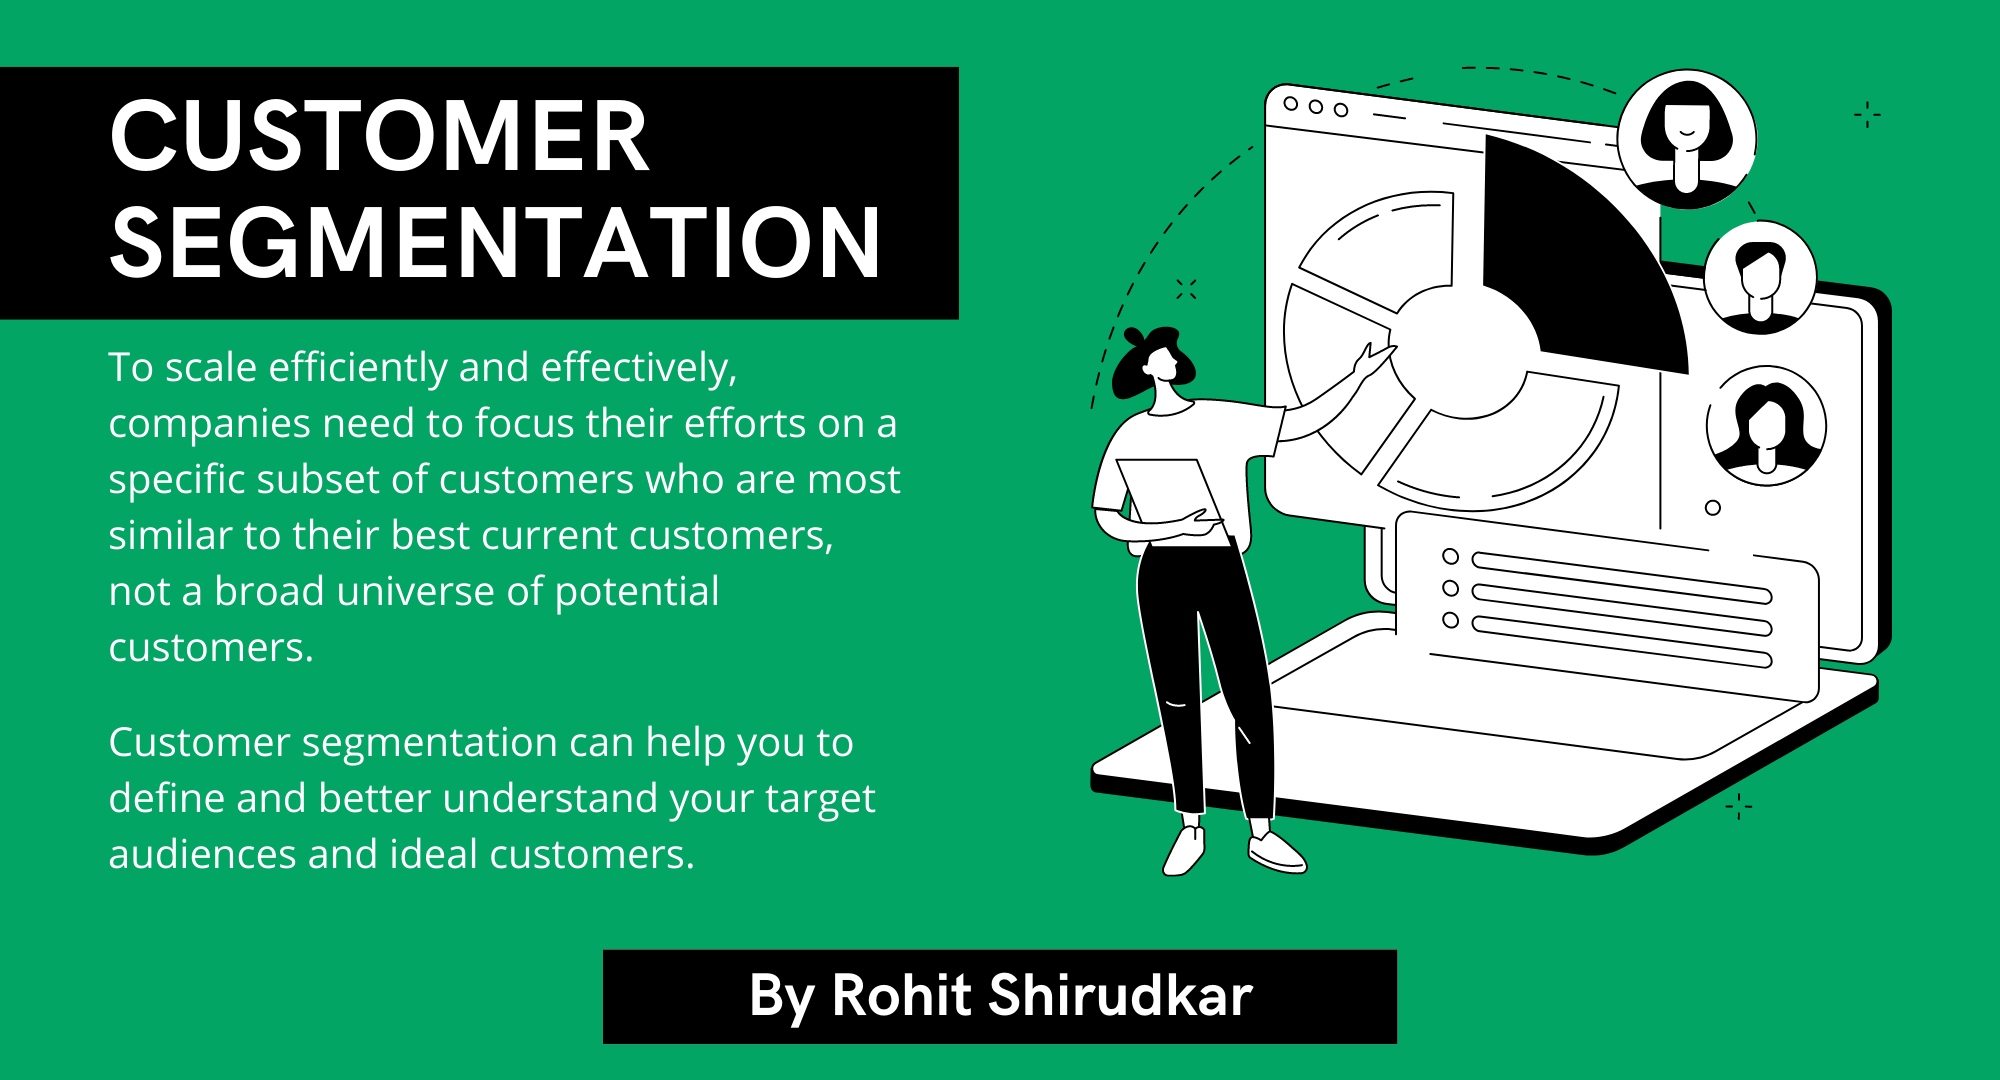

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px"> IMPORTING LIBRARIES & DATASET </p> 

### **Lets import the required libraries...**

In [1]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations
pd.set_option('display.max_columns', None) # code to display all columns

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import date, datetime # for manupulating time and date columns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler # For handling categorical column and scaling numeric columns

# Libraries for clustering and evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

### **Its time to load our data to `df` variable...**  
**Note:** The csv file is tab seperated, so i'll need to set `sep` parameter to `'\t'`

In [2]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep='\t')

***

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">INITIAL ANALYSIS</p> 

### **Understand Your Data** 🧠
You should always ask these following quetions to undertand your data
### 1.How big is your data?

In [3]:
df.shape

(2240, 29)

### 2.How does the data look like?

In [4]:
df.sample(5) # sample selects random rows from your data 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1993,10164,1958,Graduation,Single,94472.0,0,1,03-04-2014,75,1017,33,417,108,100,16,1,5,5,5,5,0,1,1,0,0,0,3,11,0
1633,10207,1978,Graduation,Together,22775.0,1,0,19-06-2013,40,5,1,8,0,0,1,1,1,0,2,8,0,0,0,0,0,0,3,11,0
1864,9064,1982,Graduation,Married,69109.0,0,0,09-11-2012,10,823,25,459,124,29,95,1,6,6,7,4,0,0,1,0,0,0,3,11,1
1448,1232,1982,PhD,Together,70038.0,0,0,25-10-2013,54,587,54,348,71,54,130,1,4,4,8,2,0,0,0,0,0,0,3,11,0
1759,5883,1972,Graduation,Married,77981.0,1,0,26-05-2013,78,138,120,204,16,126,60,3,7,4,7,5,0,0,0,0,0,0,3,11,0


### 3.What is the data type of cols?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 4.Are there any missing values?

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### 5.How does the data look mathematically?

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 6.Are there duplicate values?

In [8]:
df.duplicated().sum()

0

<div style="color:white;
           display:fill;
           background-color:#03a564;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observations 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Data contains 2240 rows and 29 columns <br>
           2. It has 1 float, 3 object and 25 int columns <br>
           3. Datetime columns have int datatype, need to fix that <br>
           4. Many categorical columns are alredy in int format, like AcceptedCmp1, Response <br>
           5. There are 24 missing values in Income column <br>
           6. There are no duplicate values within data
        </p>
    </div>

***

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">DATA CLEANING & FEATURE CONSTRUCTION</p> 

### **Steps To Follow:**
*  First of all here we will correct the column names
*  We will convert the datetime column into correct format
*  Finally we'll take care of the missing values
*  Examin the unique values within categorical columns
*  Check the timeline of the data since we have datetime columns given

In [9]:
df.rename(columns = {'MntGoldProds':'MntGoldProducts'}, inplace = True)

In [10]:
# converting columns to DateTime format
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'], format ='%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [11]:
df['Income'].skew()

6.763487372811116

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
If the skewness is less than -1 or greater than 1, the data are highly skewed.
</div>

In [12]:
# Replacing null values with median cause the data is skewed which means there are outliers in the data
df['Income'].fillna(df['Income'].median(), inplace = True)

In [13]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
df["Dt_Customer"].dt.year.min() , df["Dt_Customer"].dt.year.max()

(2012, 2014)

### **Steps To Follow:**
*  Create `Age`,`Years_Customer` and `Days_Customer` columns by substracting last date of `Dt_Customer` from `Year_Birth` and `Dt_Customer`
*  Create `TotalMntSpent`,`TotalNumPurchases` and `TotalAccCmp` by adding the relative columns
*  Create `Year_Joined`,`Month_Joined` and `Day_Joined` columns through `dt_Customer`
*  Create `Age_Group` column by dividing `Age` column into different groups
*  Create `Children` column by adding `Kidhome` and `Teenhome` columns
* Create `Partner` and `Education_Level` for simplifying `Marital_Status` and `Education` columns
* Drop the redundant columns

In [16]:
# Creating Age and Years_Customer ( Amount of years a personn has been customer) columns.
df['Age'] = (df["Dt_Customer"].dt.year.max()) - (df['Year_Birth'].dt.year)
df['Years_Customer'] = (df["Dt_Customer"].dt.year.max()) - (df['Dt_Customer'].dt.year)
df['Days_Customer'] = (df["Dt_Customer"].max()) - (df['Dt_Customer'])

# Total amount spent on products
df['TotalMntSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProducts']

# Total number of purchases made
df['TotalNumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Total number of accepted campaigns
df['Total_Acc_Cmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

# adding columns about the day, month and year cutomer joined
df['Year_Joined'] = df['Dt_Customer'].dt.year
df['Month_Joined'] = df['Dt_Customer'].dt.strftime("%B")
df['Day_Joined'] = df['Dt_Customer'].dt.day_name()

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])
# Total children living in the household
df["Children"] = df["Kidhome"] +  df["Teenhome"]

#Deriving living situation by marital status
df["Partner"]=df["Marital_Status"].replace({"Married":"Yes", "Together":"Yes", "Absurd":"No", "Widow":"No", "YOLO":"No", "Divorced":"No", "Single":"No","Alone":"No"})

#Segmenting education levels in three groups
df["Education_Level"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [17]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [18]:
# Converting Days_Joined to int format
df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [19]:
print(df.shape)
df.sample(5)

(2240, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
70,Master,Married,66991.0,0,0,1,496,36,460,189,60,12,3,4,8,6,3,0,0,0,0,0,0,0,60,2,757,1253,21,0,2012,November,Friday,Middel Aged,0,Yes,Postgraduate
1098,Master,Together,27590.0,1,0,38,6,0,5,0,0,1,1,1,0,2,7,0,0,0,0,0,0,0,32,1,592,12,4,0,2013,April,Tuesday,Adult,1,Yes,Postgraduate
924,Graduation,Together,83033.0,1,0,82,812,99,431,237,149,33,1,11,4,10,5,0,0,0,1,0,0,0,28,0,202,1761,26,1,2014,May,Sunday,Adult,1,Yes,Graduate
354,PhD,Single,60000.0,0,1,57,1048,0,217,0,0,12,5,11,3,5,6,0,0,0,0,0,0,0,38,2,714,1277,24,0,2012,December,Saturday,Adult,1,No,Postgraduate
1987,Graduation,Married,51373.0,0,0,37,83,2,101,64,26,117,1,3,5,3,4,0,0,0,0,0,0,0,23,1,532,393,12,0,2013,June,Saturday,Young adult,0,Yes,Graduate


***

#### We will only consider the customers who have been customer for more than 700 days (2 years)
#### Otherwise even if customer is well educated and with high income, the total amount spent by him/her might be less than the customer with less income but have been customer for 2 years.

In [20]:
# apply the 700 days filter to the data
df = df[df['Days_Customer']>=700].reset_index(drop=True)

print(df.shape)
df.sample(5)

(512, 37)


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Years_Customer,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Year_Joined,Month_Joined,Day_Joined,Age_Group,Children,Partner,Education_Level
301,Graduation,Together,18227.0,1,0,21,1,2,7,4,3,11,1,0,1,2,8,0,0,0,0,0,0,0,27,2,847,28,4,0,2012,August,Saturday,Adult,1,Yes,Graduate
167,PhD,Single,52614.0,0,1,63,789,0,142,12,9,38,2,2,4,8,8,0,0,0,0,0,0,0,39,2,1059,990,16,0,2012,January,Thursday,Adult,1,No,Postgraduate
132,Graduation,Widow,43638.0,0,1,37,63,10,83,7,19,19,2,4,1,4,7,0,0,0,0,0,0,0,45,2,911,201,11,0,2012,June,Friday,Middel Aged,1,No,Graduate
14,2n Cycle,Married,7500.0,0,0,24,3,18,14,15,22,50,3,3,1,3,9,0,0,0,0,0,0,1,18,2,816,122,10,1,2012,September,Tuesday,Young adult,0,Yes,Undergraduate
124,Basic,Married,24279.0,0,0,6,16,36,21,20,62,108,1,4,1,3,8,0,0,0,0,0,0,0,24,2,707,263,9,0,2012,December,Saturday,Young adult,0,Yes,Undergraduate


#### We don't require all the columns in the data, we used them in EDA but we don't need them all now, so we'll drop redundant columns

In [21]:
df1 = df.copy() # make a copy to add clusters to this data
df1.drop(['Education','Marital_Status','Years_Customer','Year_Joined','Month_Joined','Day_Joined'], axis=1, inplace=True)

#### Let's use capping technique to treat outliers

In [22]:
num_col = df1.select_dtypes(include = np.number).columns

In [23]:
for col in num_col:
    q1 = df1[col].quantile(0.25)
    q3 = df1[col].quantile(0.75)
    iqr = q3-q1
    ll = q1-(1.5*iqr)
    ul = q3+(1.5*iqr)
    for ind in df1[col].index:
        if df1.loc[ind,col]>ul:
            df1.loc[ind,col]=ul
        elif df1.loc[ind,col]<ll:
            df1.loc[ind,col]=ll
        else:
            pass
print("Outliers have been taken care of")

Outliers have been taken care of


***

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">FEATURE TRANSFORMATION</p> 

### **Steps To Follow:**
*  Here first we will encode ordinal column and then nominal columns
*  We will drop the redundant columns and concat the encoded columns with our data
*  Next we'll scale the data using StandardScaler

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; Label Encoder transformer should be used to encode only target values, i.e. y(Dependant), and not the input X(Independant).
</div>

In [24]:
oe = OrdinalEncoder(categories=[['Undergraduate','Graduate','Postgraduate']])
df_education = pd.DataFrame(oe.fit_transform(df1[['Education_Level']]), columns=['Education_Level'])

In [25]:
df_dummies=pd.get_dummies(df1[['Age_Group','Partner']],drop_first=True)

In [26]:
df1.drop(['Education_Level','Age_Group','Partner'],axis=1, inplace=True)

In [27]:
df2 = pd.concat([df1,df_education,df_dummies], axis=1)

In [28]:
df2.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Education_Level,Age_Group_Adult,Age_Group_Middel Aged,Age_Group_Senior Citizen,Partner_Yes
386,42033.0,1,1,95,11,1.0,4.0,2.000,0.0,7,1.0,1,0,2,7.0,0,0,0,0,0,0,0,43,808.0,25,4.0,0.0,2.0,0.0,1,0,0,1
335,62807.0,0,1,83,526,28.0,135.0,10.000,21.0,99,3.0,5,3,12,5.0,0,0,0,0,0,0,0,54,827.0,819,23.0,0.0,1.0,1.0,0,1,0,1
425,58217.0,2,1,84,68,1.0,13.0,3.000,5.0,13,1.0,2,0,4,6.0,0,0,0,0,0,0,0,63,749.0,103,7.0,0.0,2.5,2.0,0,1,0,0
459,63684.0,0,1,61,575,80.0,428.0,145.875,93.0,80,3.0,8,4,8,5.0,0,0,0,0,0,0,0,44,740.0,1464,23.0,0.0,1.0,1.0,1,0,0,1
97,23442.0,1,0,71,2,0.0,6.0,8.000,6.0,5,1.0,1,0,3,7.0,0,0,0,0,0,0,0,27,712.0,27,5.0,0.0,1.0,1.0,1,0,0,0


In [29]:
# scaling all the numeric columns
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Age', 'Days_Customer',
       'TotalMntSpent', 'TotalNumPurchases', 'Total_Acc_Cmp', 'Children',
       'Education_Level']
scaler = StandardScaler()
scaled_df = df2.copy()
scaled_df[num_cols] = scaler.fit_transform(scaled_df[num_cols])
print('The data has been scaled successfully!')

The data has been scaled successfully!


In [30]:
scaled_df.sample(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Customer,TotalMntSpent,TotalNumPurchases,Total_Acc_Cmp,Children,Education_Level,Age_Group_Adult,Age_Group_Middel Aged,Age_Group_Senior Citizen,Partner_Yes
77,-0.988796,1.163406,0.912989,-0.571854,-1.001275,-0.833336,-0.870576,-0.685649,-0.734285,-0.914415,0.076239,-0.990873,-1.091198,-0.975033,0.336168,0,0,0,0,0,0,0,-0.100694,-1.218357,-1.106397,-1.146665,-0.672510,1.557179,-0.303698,1,0,0,0
417,-0.208221,-0.783208,0.912989,0.726395,1.046155,0.083597,-0.072265,-0.831449,0.664370,1.510298,1.567989,-0.271770,0.375189,0.247040,1.249261,0,0,0,0,0,0,0,0.593653,-0.769951,0.630181,0.528717,-0.672510,0.143570,1.177191,0,1,0,0
130,-0.869316,1.163406,-0.934641,0.897217,-1.020084,-0.711079,-0.854715,-0.685649,-0.646869,-1.019837,-0.918262,-1.350424,-1.091198,-0.975033,0.792715,0,0,0,0,0,0,0,-1.402594,1.736524,-1.109558,-1.533291,-0.672510,0.143570,-0.303698,1,0,0,1
5,-0.441988,1.163406,0.912989,0.043106,-0.899172,-0.680514,-0.833568,-0.789792,-0.442899,-0.977668,0.076239,-0.631322,-1.091198,-0.975033,0.792715,0,0,0,0,0,0,0,-0.881834,-1.206860,-1.024230,-1.017789,-0.672510,1.557179,-0.303698,1,0,0,1
383,1.317771,-0.783208,-0.934641,-1.289308,0.750594,0.694886,2.187852,-0.394049,1.596806,0.688004,-0.918262,-0.271770,1.108382,-0.363996,-1.946565,0,0,0,0,0,0,1,-0.881834,0.379808,1.595650,-0.115661,0.593391,-1.270040,1.177191,1,0,0,0


***

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">CLUSTERING</p> 

### **Steps To Follow:**
* Before applying the K-Means algorithm we need to decide how many clusters we would like to have using Within Clusters Sum of Squares(WCSS) or Elbow Method and Silhouette Score for validation
* Visualize the elbow plot and silhouette plot to choose the number of clusters

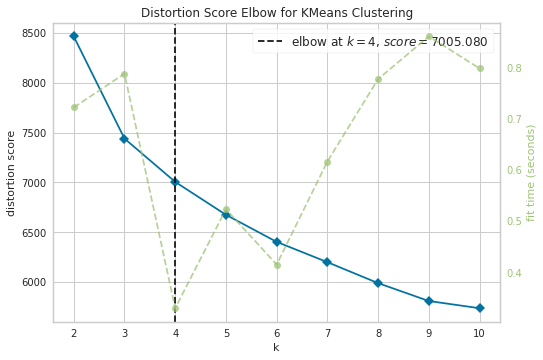

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
elbow_graph = KElbowVisualizer(KMeans(random_state=43), k=10)
elbow_graph.fit(scaled_df)
elbow_graph.show()

<div class="alert alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp; The value of the silhouette coefﬁcient is between [-1, 1].
A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters.
The worst value is -1. Values near 0 denote overlapping clusters.
</div>

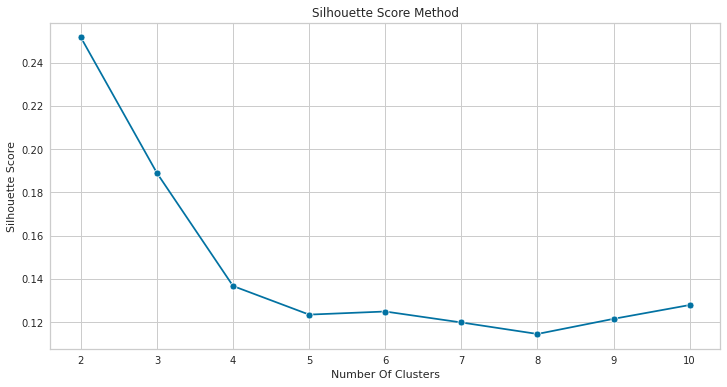

In [32]:
clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
s_scores = [] # silhouette scores

for n in clusters:
    kmeans = KMeans(n_clusters = n, random_state=43).fit(scaled_df)
    silhouette = silhouette_score(scaled_df, kmeans.labels_)
    s_scores.append(silhouette)

plt.figure(figsize=(12,6))
sns.lineplot(clusters, s_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

<div style="color:white;
           display:fill;
           background-color:#03a564;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Observation 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. As you can see we are getting really bad silhouete score, it should be near to +1 <br>
           2. The higher the number of features in the clustering problem, the more difficult it will be to work with, processing high-dimensional data will bring high processing power and cost.  <br>
           3. So we can do size reduction before clustering. Dimension reduction is the process of reducing the number of said random variables by obtaining a set of fundamental variables. <br>
           4. We will use PCA : It is a technique that reduces the dimensionality of datasets, increases their interpretability, and also minimizes information loss.
        </p>
    </div>

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">PCA</p> 

Explained Variance Ratio For n_components=1 is 35.61317259333881


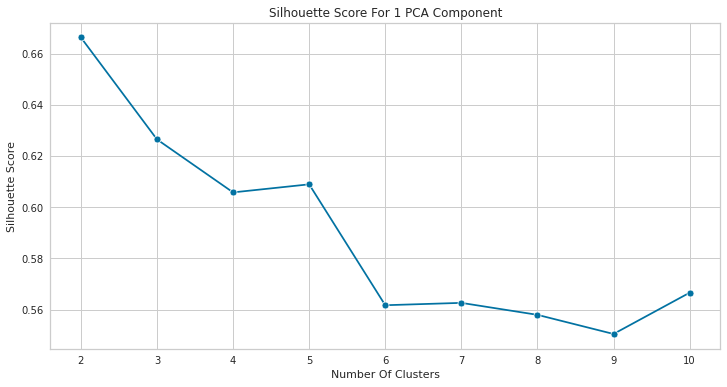

Explained Variance Ratio For n_components=2 is 48.42298461870686


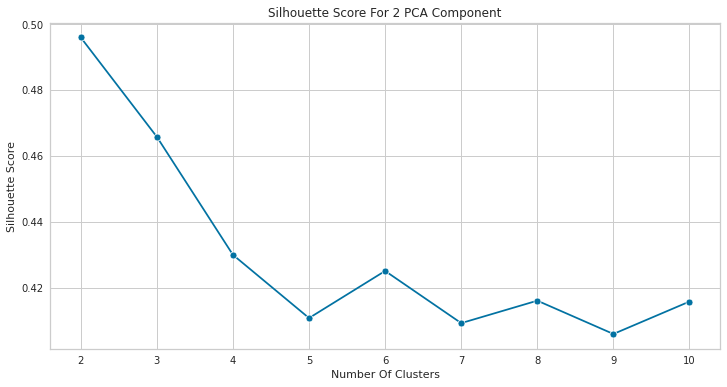

Explained Variance Ratio For n_components=3 is 55.214408763681064


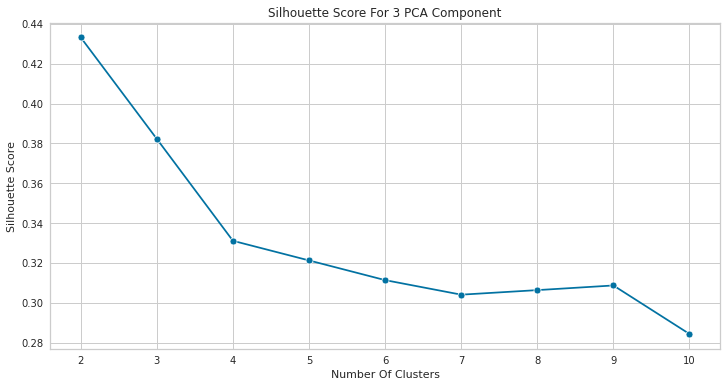

Explained Variance Ratio For n_components=4 is 61.079974187489206


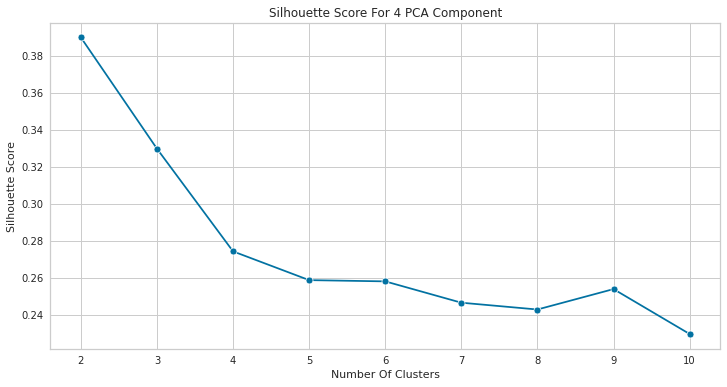

Explained Variance Ratio For n_components=5 is 65.85843387015254


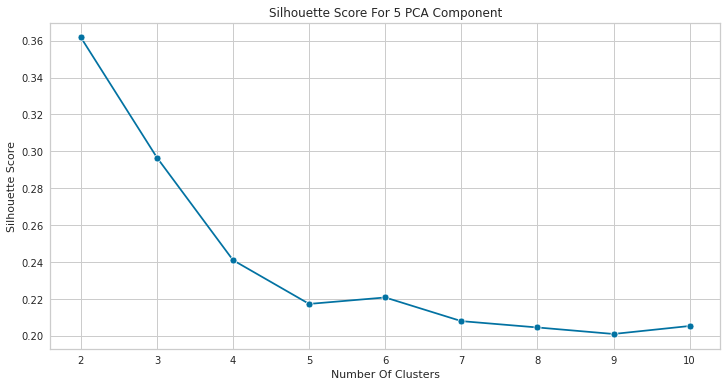

Explained Variance Ratio For n_components=6 is 70.29962287867386


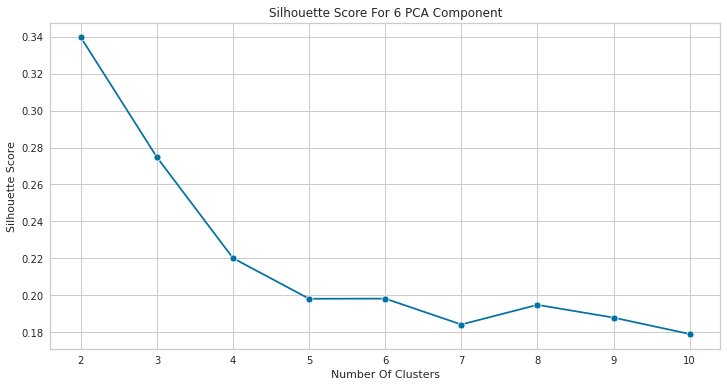

Explained Variance Ratio For n_components=7 is 74.31655873275884


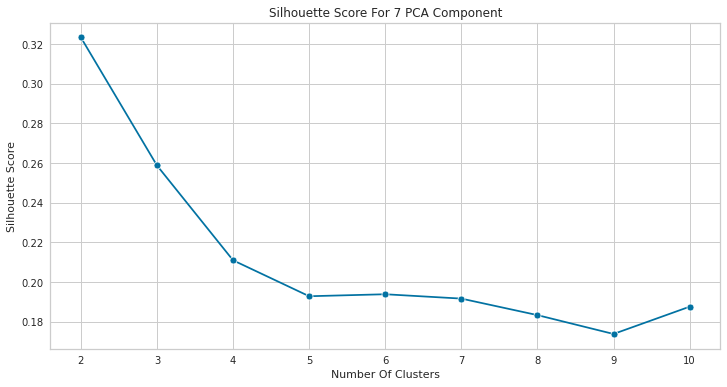

Explained Variance Ratio For n_components=8 is 77.86130161252419


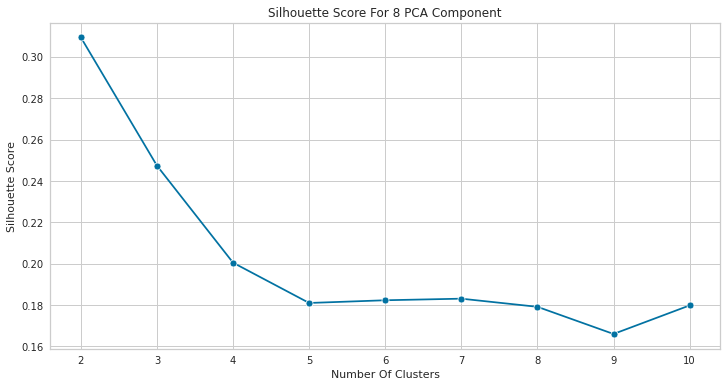

In [33]:
# block of code to findout for how many n_components we are getting best silhouette score

components = [1,2,3,4,5,6,7,8]

for n in components:
    pca = PCA(n_components = n, random_state=43)
    pca.fit(scaled_df)
    pca_df = pca.transform(scaled_df)
    print('Explained Variance Ratio For n_components={} is {}'.format(n,pca.explained_variance_ratio_.sum() * 100))
    
    clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
    s_scores = [] # silhouette scores
    for k in clusters:
        kmeans = KMeans(n_clusters = k, random_state=43).fit(pca_df)
        silhouette = silhouette_score(pca_df, kmeans.labels_)
        s_scores.append(silhouette)

    plt.figure(figsize=(12,6))
    sns.lineplot(clusters, s_scores, marker='o')
    plt.title('Silhouette Score For {} PCA Component'.format(n))
    plt.xlabel('Number Of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

In [34]:
pca = PCA(n_components=7, random_state=43)
pca.fit(scaled_df)

pca_df = pd.DataFrame(pca.transform(scaled_df), columns=["col1", "col2", "col3", "col4", "col5", "col6", "col7"])

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">K-Means & Model Evaluation</p> 

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Clusters'] = kmeans.fit_predict(pca_df)

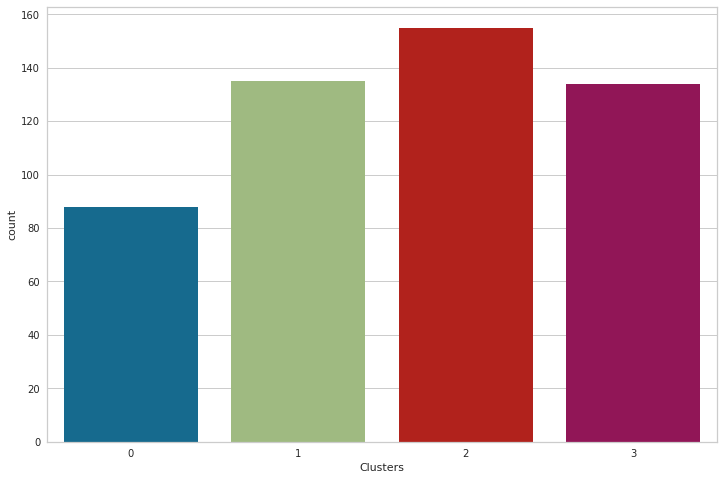

In [36]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df)
plt.show()

* Cluster 0 has least amount of customers
* Cluster 1 & 3 has around same number of customers 
* Cluster 2 has large number of customers among all the clusters

**Now we'll try to find out what type of customers each cluster has. How many childrens customers within each cluster has, whats thir educational background,whats the age group of customers within ech cluster etc...**

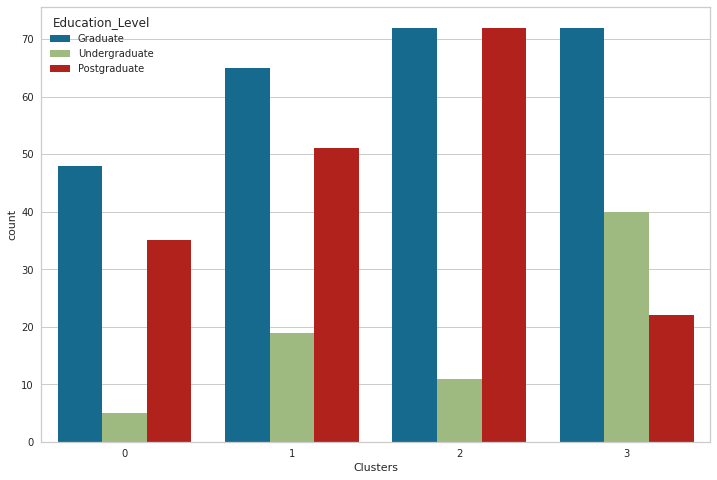

In [37]:
# Lets see how  many customers from each cluster has what kind of education level
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df, hue='Education_Level')
plt.show()


* So we have the customers with all three education level in each cluster
* Cluster 0 is mostly consist of graduate and post graduate customers and 4or5 undergraduates
* Cluster 1 is similar to cluster 0 regarding education level of customers 
* Cluster 2 has most number of graduates and post graduates and very few undergraduates
* Cluster 3 has least number of postgraduates and large number of undergraduate than any other cluster


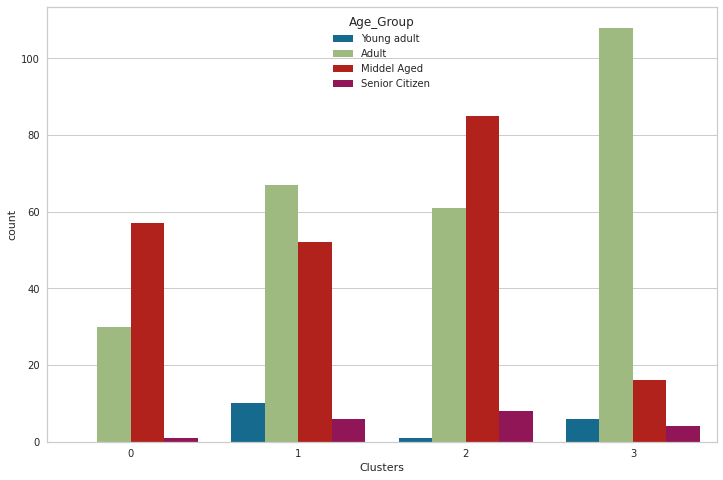

In [38]:
# Lets see what are the age groups of customers within each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df, hue='Age_Group')
plt.show()

* Cluster 0 has no cutomers within young adult age group and has 1 or 3 customers from senior citizen age group. Cluster 3 largly consists of customers from middel aged and adult age group
* Cluster 1 is largly consist of customers belonging to Adult and then middel aged age group. It has very few customers from young adult and senior citizen age group
* Cluster 2 is similar to cluster one 
* Cluster 3 is largly only consist of cutomers from adult age group and hadfull of customers from middel aged, young adult and senior citizen age group

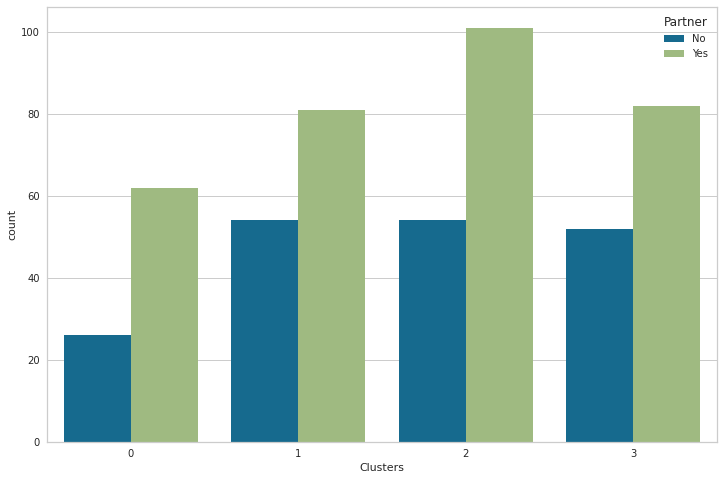

In [39]:
# Now lets findout how  many customers from each cluster has partner and see if we find something interesting
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df, hue='Partner')
plt.show()

* We got see similar trend among each cluster. All clusters consists of customers which have partner and which are single.
* They all have more number customers having partner in each cluster
* Cluster 2 has more number of customers with partner as compared to others

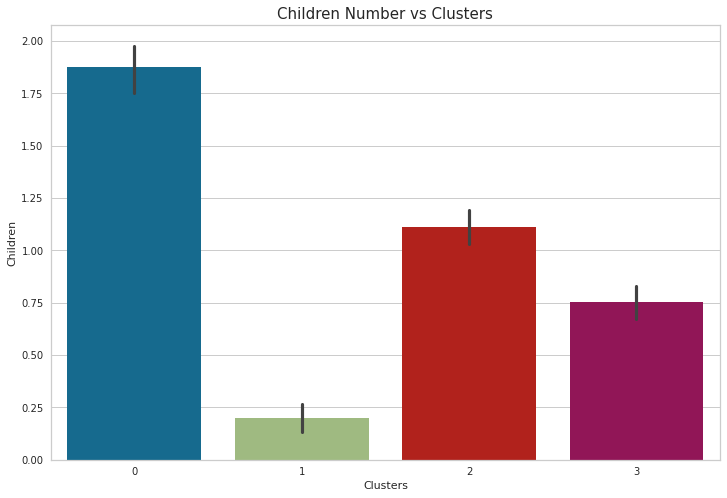

In [40]:
# Find out the customers which have kids or tenns in different clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Children"])
plt.title("Children Number vs Clusters", size=15)
plt.show()

* Cluster 0 has the customers with most number of kids or teens in household
* Cluster 1 has the customers with least amount of kids or teens in household

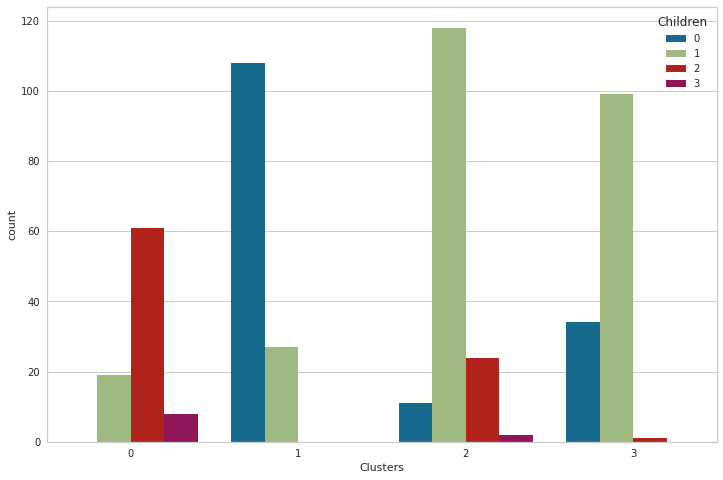

In [41]:
# Now lets findout how  many customers from each cluster has exact number of kids or teens in household
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df, hue='Children')
plt.show()

* All the customers from Cluster 0 have kids or teens in household. Most customers have 2 kids, some have 1 and few have 3 children in household
* Maximum number of customers from cluster 1 have no children in household. Hoever there are few with 1 children in household.
* Cluster 2 largly consist of customers having 1 child in household. Very few have no children at all in household and remaining have 2 or 3 children in household.
* Cluster 3 is similar to cluster 2. It consist of customers with 1 children and very few with no kids in household

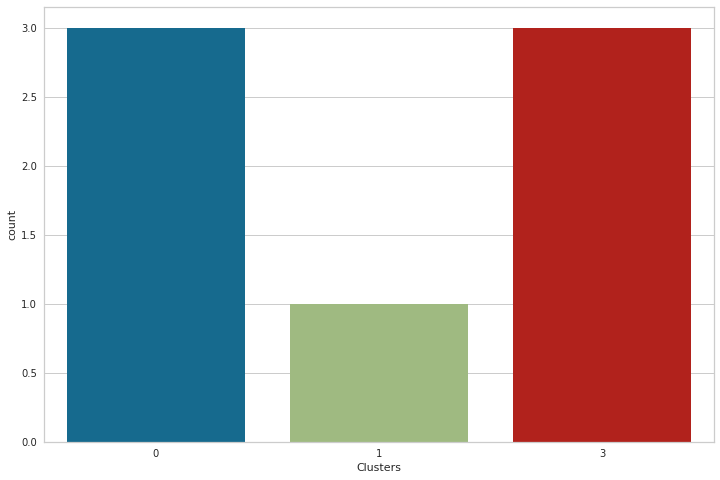

In [42]:
# Now lets findout how  many customers from each cluster have complained
plt.figure(figsize=(12, 8))
sns.countplot(x='Clusters', data=df[df['Complain']==1])
plt.show()

* We already know there really few compaints, and this sholdent be taken for granted
* Customers from cluster 2 have no complaints and cluster has only 1 complain

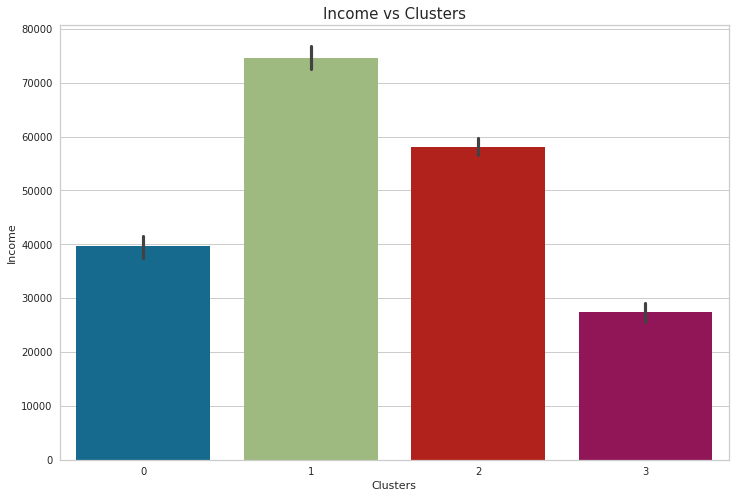

In [43]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"])
plt.title("Income vs Clusters", size=15)
plt.show()

* Even tho the number of customers in cluster 0 were very less than cluster 3, still the income of customers within cluste 0 is more than cluster 3. Reason might be there are more undergraduates in cluster 3, causing low income
* same goes for cluster 1 and 2. Cluster 1 customer has more income than cluster 2 despite the fact that cluster 2 has maximum number of customers than any other cluster.

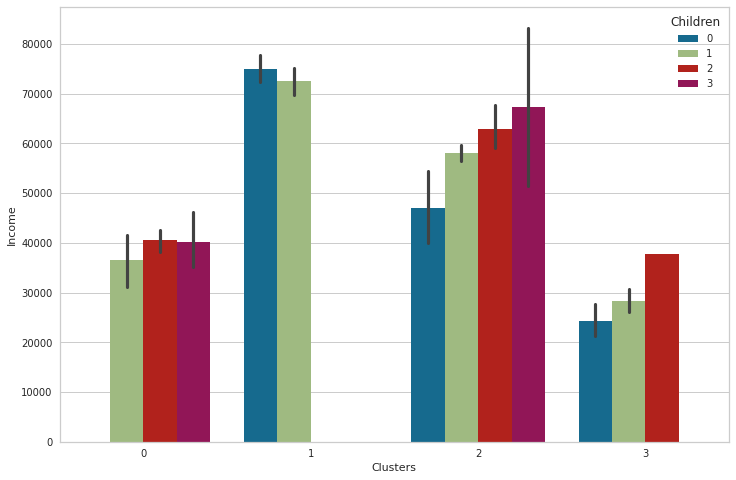

In [44]:
# It will be interesting to know the income of customers in each clusters depending on the number of children they have in household
plt.figure(figsize=(12, 8))
sns.barplot(x=df["Clusters"], y=df["Income"], hue=df['Children'])
plt.show()

* For cluster 0 we can see that al the customers are earning the same no matter how many children they have in household. Still customers with 2 or 3 chidren earning slightly more. But the interesting to note is cluster 0 has very few customers with 3 children in household and still they are matching up with other customers.
* Same goes for the cluster 1. It largly consist of customers with 0 childrenand very few with 1 children but still they'r income is similar
* Again we get to see that customers with more children in household has high household income

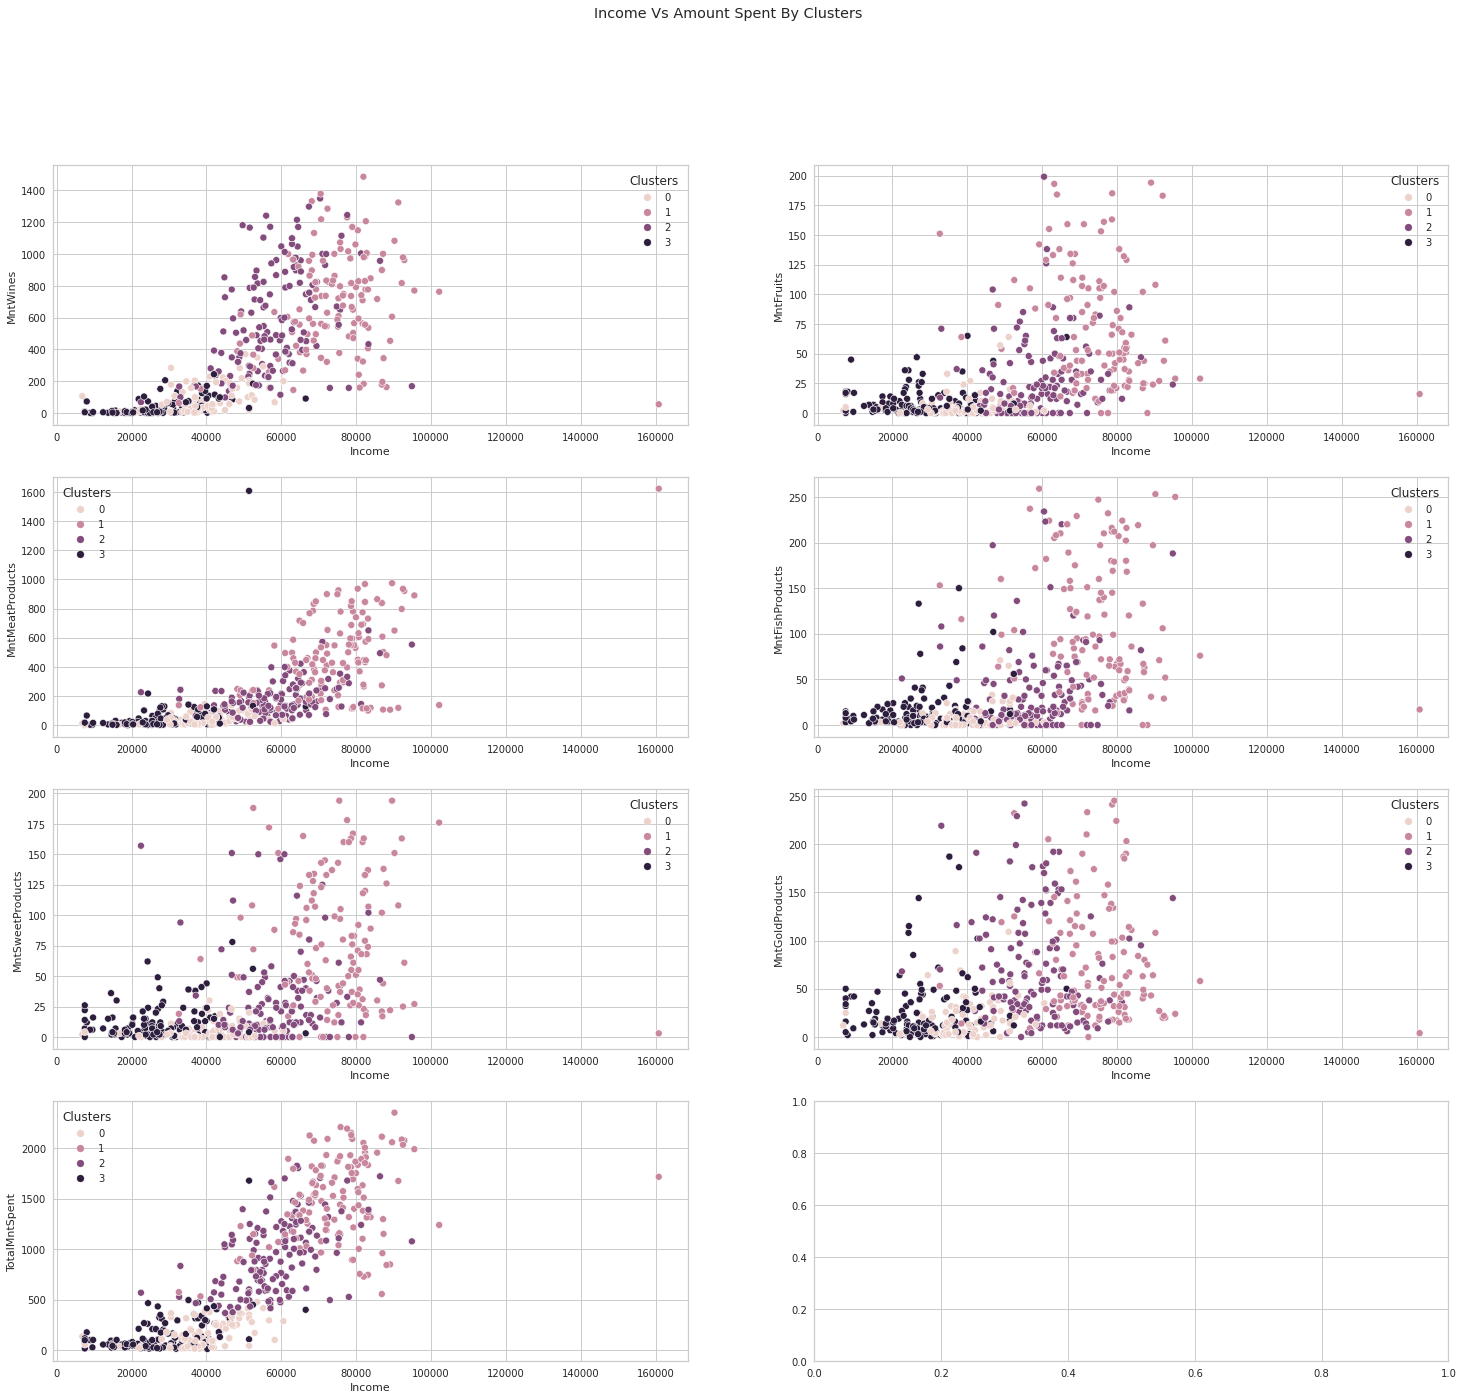

In [45]:
# Lets see how customers spent money on different products depending on their income
MntColumns= ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProducts','TotalMntSpent']

_, ax1 = plt.subplots(4,2, figsize=(25,22))
plt.suptitle('Income Vs Amount Spent By Clusters')

for i, col in enumerate(MntColumns):
    sns.scatterplot(x='Income', y=col, data=df, ax=ax1[i//2, i%2],hue='Clusters')
    
plt.show()

* Cluster 1 and 2 has high income and have spent more money on different products
* Cluster 0 and 3 has low income and have spent less  money
* We can see that clusters are overlapping , thats why clusters have customers with similar characteristics

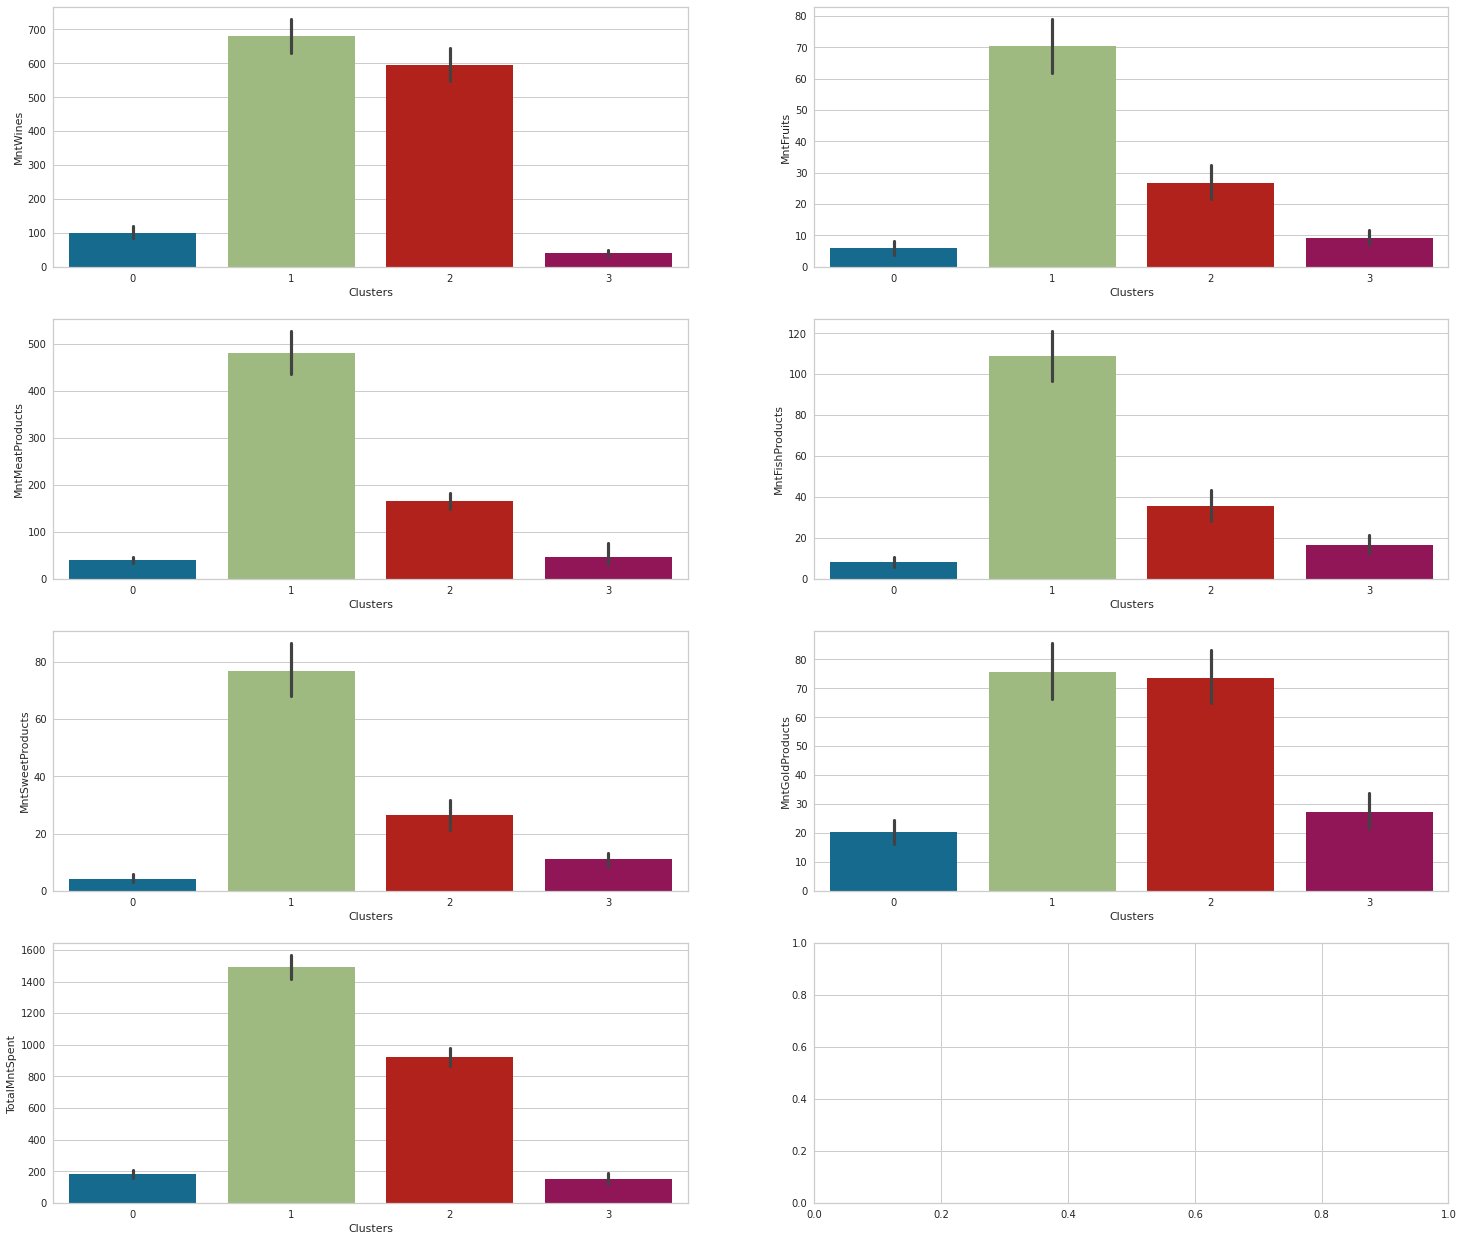

In [46]:
# Barplot to see money spent by different customers on differen products
_, ax1 = plt.subplots(4,2, figsize=(25,22))
for i, col in enumerate(MntColumns):
    sns.barplot(x='Clusters', y=col, data=df, ax=ax1[i//2, i%2])
    
plt.show()

* Cluster 1 has spent more money than any other clusters on all products
* Cluster 2 is second in spending most money, cluster 2 has spent more money on wines and goldproducts than any other products
* Cluster 0  has spent less money as compared to 1 and 2 clusters. Still cluster 0 has spent more monry on wines and goldproducts
* cluster 3 has spent least money as compared to other clusters

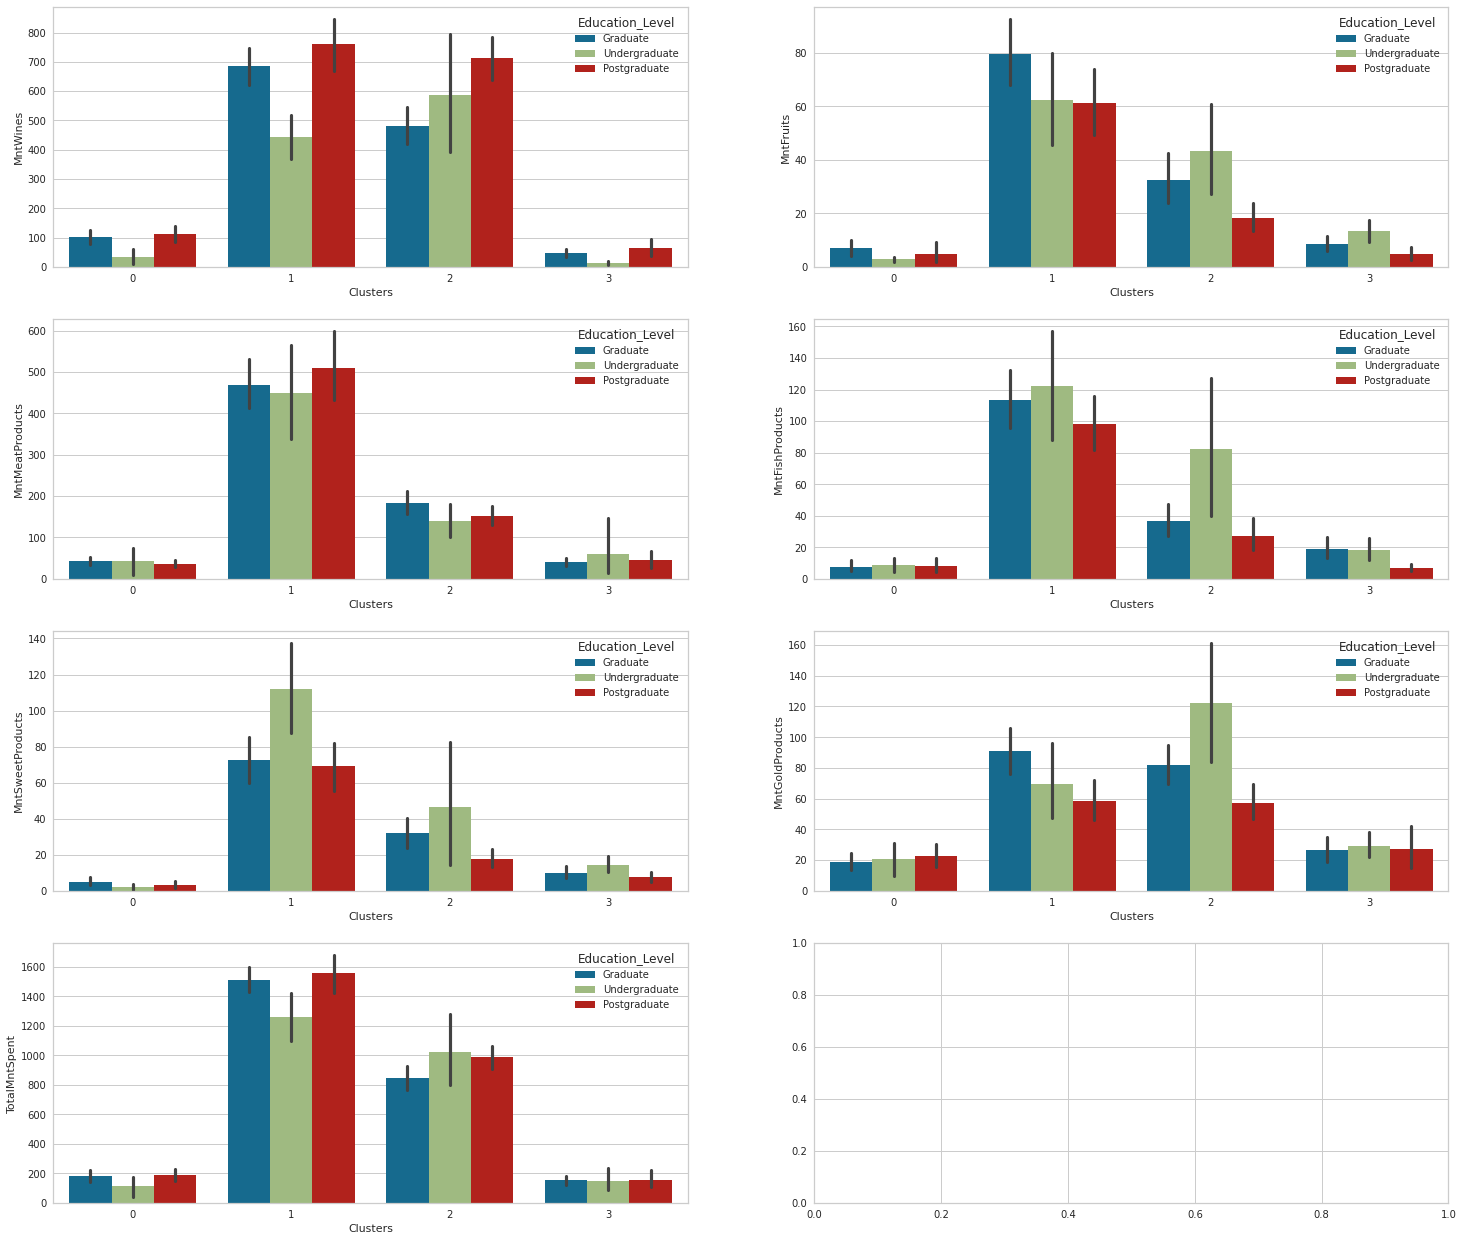

In [47]:
# Let's see if there are any customers withspecific educational background in clusters spending money on specific products
_, ax1 = plt.subplots(4,2, figsize=(25,22))
for i, col in enumerate(MntColumns):
    sns.barplot(x='Clusters', y=col, data=df, ax=ax1[i//2, i%2], hue='Education_Level')
    
plt.show()

* A very interesting thing we can see is, undergraduates from all clusters are spending more money on sweets, fish, gold and fruits than customers with any other education background

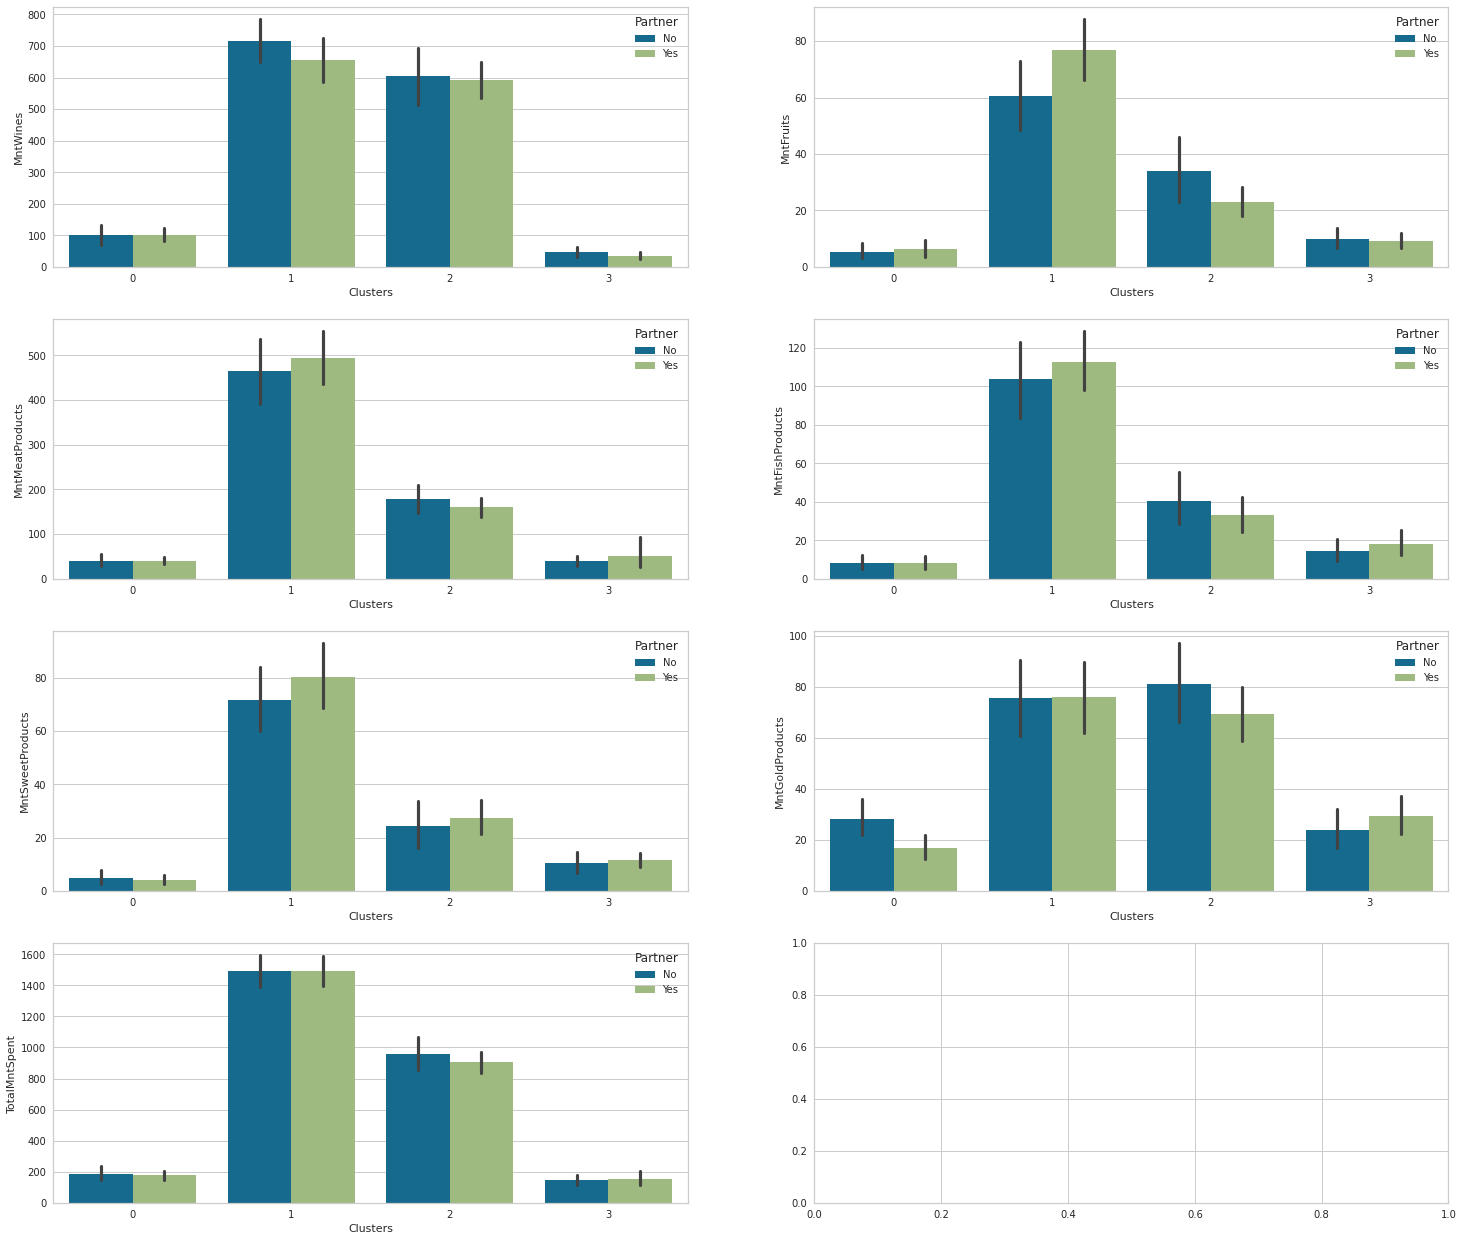

In [48]:
# Let's see if there's any difference between money spent by customers with partner and without partner within different clusters
_, ax1 = plt.subplots(4,2, figsize=(25,22))
for i, col in enumerate(MntColumns):
    sns.barplot(x='Clusters', y=col, data=df, ax=ax1[i//2, i%2], hue='Partner')
    
plt.show()

* Theres not much difference or trend that we can see. All customers within all clusters have similar trend. Money spent by singles and customers with partner is similar , theres not much 

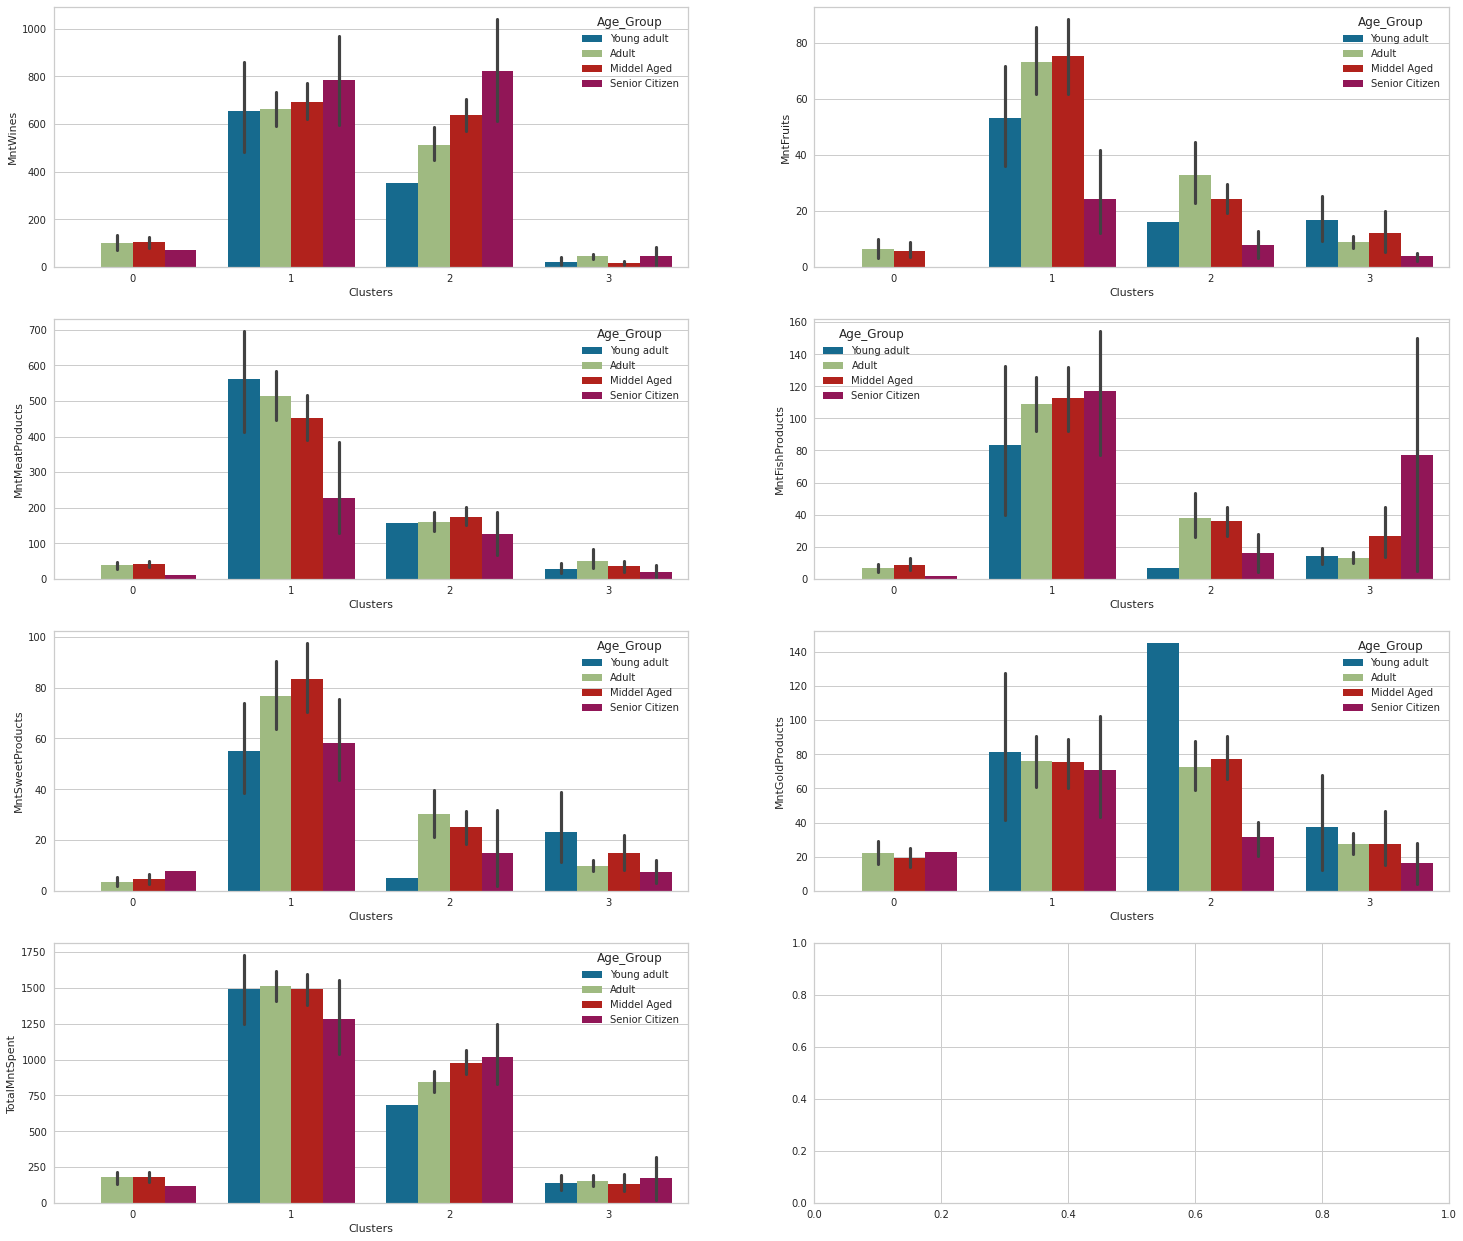

In [49]:
# Let's see if there's any difference between money spent by customers with partner and without partner within different clusters
_, ax1 = plt.subplots(4,2, figsize=(25,22))
for i, col in enumerate(MntColumns):
    sns.barplot(x='Clusters', y=col, data=df, ax=ax1[i//2, i%2], hue='Age_Group')
    
plt.show()

* As we saw earlier all the clusters have very few senior citisens and youg adults, still the money spent by them is equal or more than customers from other age groups
* Senior citizens are more into buying wines and fish

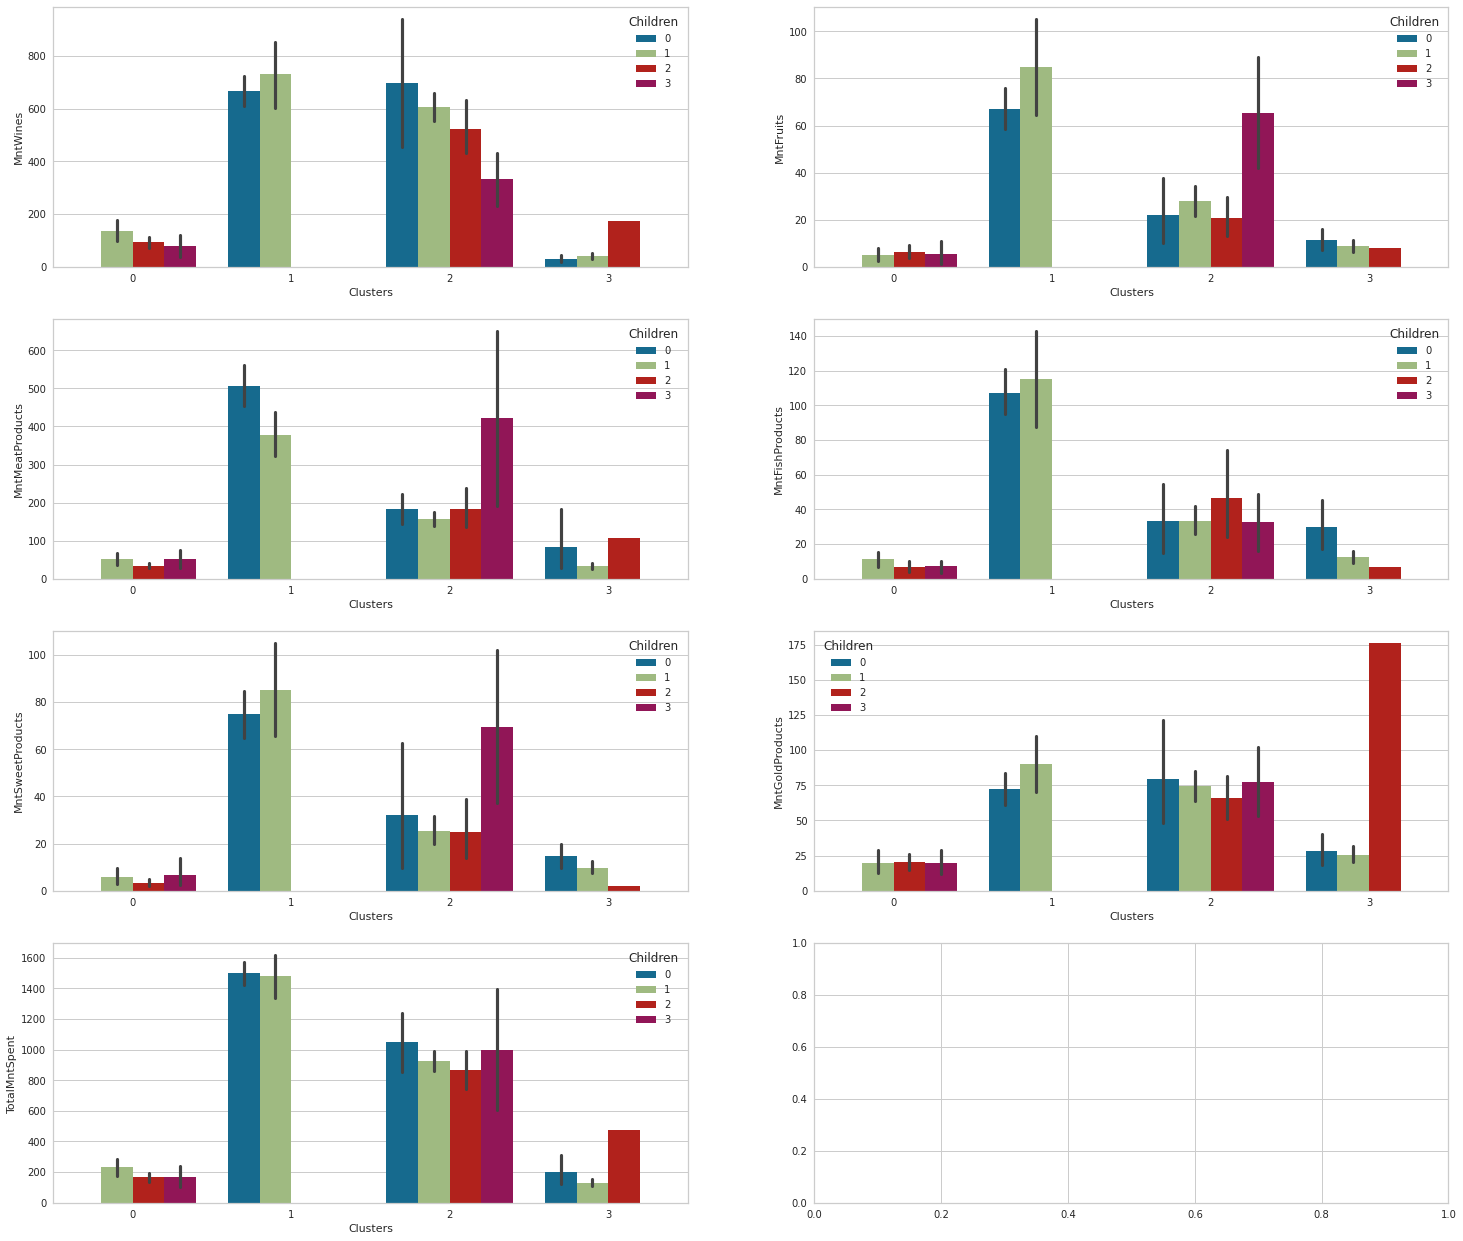

In [50]:
_, ax1 = plt.subplots(4,2, figsize=(25,22))
for i, col in enumerate(MntColumns):
    sns.barplot(x='Clusters', y=col, data=df, ax=ax1[i//2, i%2], hue='Children')
    
plt.show()

* we can see that customers with 3 children in household are more into buying fuits, meat and sweet products

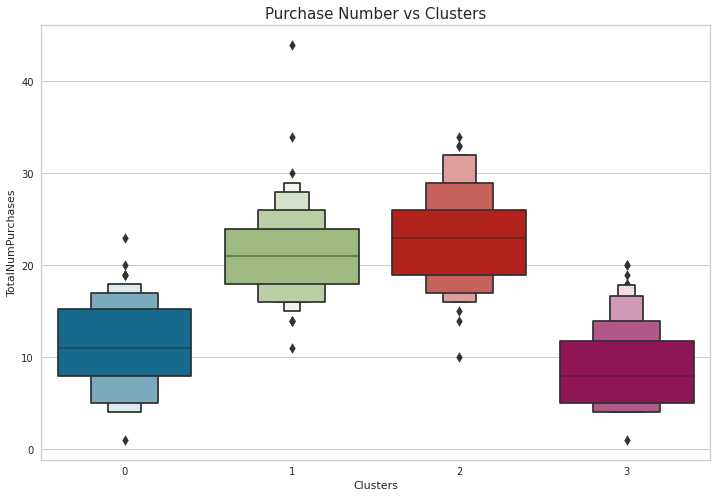

In [51]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["TotalNumPurchases"])
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

* cluster 3 does the least shopping, followed by cluster 0
* Cluster 2 and 1 does the most shopping

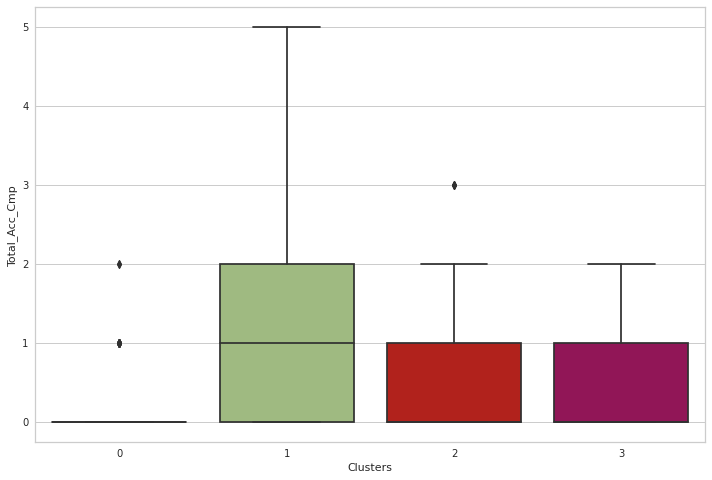

In [52]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df["Clusters"], y=df["Total_Acc_Cmp"])
plt.show()

* Cluster one has accepted the most campaign so far

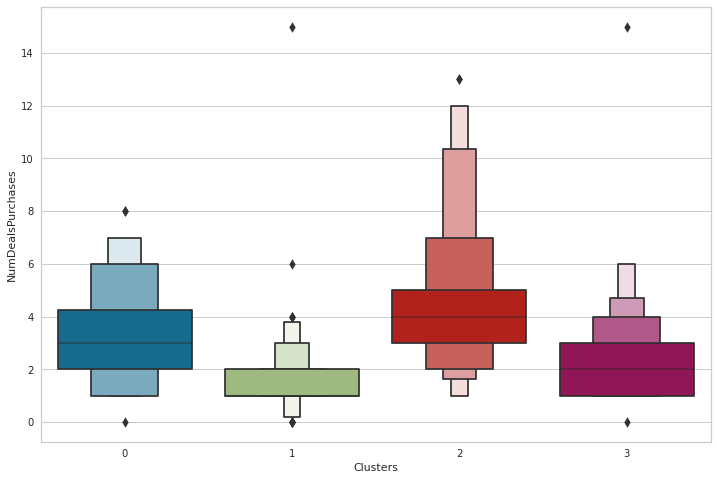

In [53]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=df["Clusters"], y=df["NumDealsPurchases"])
plt.show()

* Cluster 2 and 0 has highest number of purchases on discount deals
* Cluster 3 and one has not claimed many deals so far

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">CUSTOMER PROFILING</p>

<div style="color:White;
           display:fill;
           background-color:#03a564;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="color:white;padding-left:20px"><b>Best Performing Clusters 👀</b></h1>
    <h3 style="color:white;padding-left:20px"><b>Cluster 1</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Well Educated <br>
2. Adults & Middel Aged <br>
3. No Kids <br>
4. High Income <br>
5. High Expenditure <br>
6. More shopping <br>
7. Positive reply to campaigns <br>
8. Not into deals and discount
        </p>
    <h3 style="color:white;padding-left:20px"><b>Cluster 2</b></h3>
    <p style="color:white;font-size:110%;padding-left:50px">
    1. Most number of customers <br>
2. Graduates & Post Graduates<br>
3. Middel Aged & Adults<br>
4. Has 1 kid or Teen<br>
5. Second Highest Income<br>
6. Above Average expenditure<br>
7. High number of purchases<br>
8. Likes to claim deals<br>
    </p>
    </div>
    
 <div style="color:#FFFFFF;
           display:fill;
           background-color:Black;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="color:white;padding-left:20px"><b>Worst Performing Clusters 👀</b></h1>
    <h3 style="color:white;padding-left:20px"><b>Cluster 0</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1. Least number of customers <br>
2. Graduates & post graduates
 <br>
3. More middel aged than adults <br>
4. Has 2 kids or teens <br>
5. Average Income <br>
6. Low expenditure <br>
7. Less shopping <br>
8. Not attracted towards campaigns <br>
9. Into deals & discounts
        </p>
    <h3 style="color:white;padding-left:20px"><b>Cluster 3</b></h3>
    <p style="color:white;font-size:110%;padding-left:50px">
    1. Graduates and undergraduates
 <br>
2. Large number of adults<br>
3. Low Income<br>
4. Has 0 or 1 children<br>
5. Low expenditure<br>
6. Less shopping<br>
7. Have accepted few campaigns and deals
    </p>
    </div>

<p style="background-color:#03a564;font-family:verdana;color:white;font-size:200%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px">Please Upvote✌</p>
<p style="background-color:#03a564;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px"> It Takes Lots Of Time & Effort To Create A Notebook! <br>
    So If You Liked It, Please Upvote <br>
And Let Me Know Your Thoughts In Comments</p>